In [1]:
import keras
print(keras.__version__)

/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.1.5


In [2]:
from keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

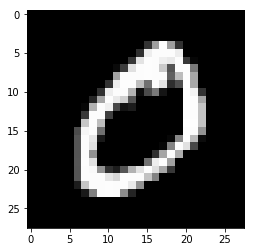

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(train_images[1], cmap="gray")

In [12]:
print(train_labels[1])

0


In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(10, activation="softmax"))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255.0
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255.0

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
print(train_labels[10])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [23]:
model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=128
)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2587 - acc: 0.9245
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.1054 - acc: 0.9684
Epoch 3/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0693 - acc: 0.9790
Epoch 4/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0503 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0371 - acc: 0.9889


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 0s 48us/step
0.07029066358448471 0.9787


In [30]:
import numpy as np
predictions = model.predict(test_images)
print(predictions[0])
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))
print(test_labels[0])
print(np.argmax(test_labels[0]))

[7.0525413e-10 1.1340033e-12 4.8605261e-07 2.2216605e-06 1.1618206e-13
 1.8952437e-09 1.4883781e-15 9.9999726e-01 2.6741547e-09 5.0773966e-08]
1.0
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7
